# Data analysis of the powerplant dataset 🏭 

- The following data analytics project aims to achieve the following:
1. Data Cleaning: Errors, inconsistencies, or missing values are carefully identified and rectified in the dataset to ensure its accuracy and readiness for analysis.

2. Data Exploration: The power plant data is visualized and summarized, and trends, distributions, and relationships within the dataset are explored to gain insights into power plant characteristics.

3. Data Preprocessing: The data is prepared for analysis by encoding categorical variables, handling outliers, and scaling or normalizing relevant features as needed.

4. Data Analysis: Statistical and data analysis techniques are applied to uncover patterns and insights, such as the analysis of how commissioning year and primary fuel type relate to power plant performance or efficiency.

5. Data Visualization: Visual representations of the data, such as charts or graphs, are created to present findings effectively, helping to highlight important trends or correlations in power plant data.

6. Model Building: Depending on the objectives of the analysis, predictive models may be built to forecast power plant efficiency or its impact on GDP.

7. Model Evaluation (if applicable): If models are constructed, their performance is evaluated using appropriate metrics to ensure accuracy and usefulness for making predictions or decisions.

8. Interpretation: Meaningful conclusions are drawn from the analysis, such as uncovering associations between certain types of power plants and higher GDP growth during their commissioning years.

In [99]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np


### Exploratory Data Analysis

In [100]:
df = pd.read_csv('output.csv')

In [101]:
df.head()

,name,country,primary_fuel,commissioning_year,extracted_gdp
0,Koman,ALB,Hydro,1985,1.897050e+09
1,Annaba,DZA,Gas,2010,1.612073e+11
2,Arbaa,DZA,Gas,2010,1.612073e+11
3,Boufarik 1,DZA,Gas,1980,4.234583e+10
4,Boufarik 2,DZA,Gas,2016,1.600342e+11


In [102]:
df.tail()

,name,country,primary_fuel,commissioning_year,extracted_gdp
15626,ZaHung,VNM,Hydro,2009,1.060147e+11
15627,Marib,YEM,Gas,2009,2.513028e+10
15628,Itezhi- Tezhi,ZMB,Hydro,1978,2.811032e+09
15629,Kafue Gorge,ZMB,Hydro,1971,1.687000e+09
15630,Maamba plant,ZMB,Coal,2016,2.095841e+10


In [103]:
df.isna().sum()

name                  0
country               0
primary_fuel          0
commissioning_year    0
extracted_gdp         0
dtype: int64

In [104]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15631 entries, 0 to 15630
Data columns (total 5 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   name                15631 non-null  object 
 1   country             15631 non-null  object 
 2   primary_fuel        15631 non-null  object 
 3   commissioning_year  15631 non-null  int64  
 4   extracted_gdp       15631 non-null  float64
dtypes: float64(1), int64(1), object(3)
memory usage: 610.7+ KB


After the EDA, we can identify that the dataset doesn't contain any missing values and thereby doesn't require any data cleaning. 

1. Geographic Diversity:

Can we break down the total extracted GDP by year for all countries, and how can we visually represent this data?
How many unique countries are represented in the dataset?✅ 

2. Primary Fuel Analysis:

What is the frequency of each primary fuel type, and how can we visualize this using a pie chart?✅ 

3. Economic Impact:

Who are the top 5 and bottom 5 countries in terms of total extracted GDP from power plants?✅ 

4. Temporal Trends:

Can we break down the total extracted GDP by year for all countries, and how can we visually represent this data? (presentation as a heatmap)

5. Temporal Range:

What is the starting year and ending year of the records in the dataset?

6. Company Insights:

Who are the top 5 and bottom 5 companies operating power 
plants?

7. Powerplant Count:

How many powerplant are included in the dataset?

8. Regional Impact:


How is the total extracted GDP distributed among different 
regions, and can we visualize this distribution?

9. Fuel Ranking:

Can we rank primary fuels based on their total extracted GDP contributions? Furthermore, can we calculate the total extracted gdp per primary fuel per entry ✅ 

In [105]:
# total number of unique countries
len(np.unique(df.country))


87

In [106]:
# how many powerplants are included in this dataset
len(np.unique(df.name))

15522

In [107]:
# frequency of each primary fuel and its visualization using a pie chart
fuels, freq = df['primary_fuel'].value_counts().keys().tolist(), df['primary_fuel'].value_counts().tolist()

In [108]:
len(np.unique(df.primary_fuel))

14

In [109]:
df['primary_fuel'].value_counts()

Solar           3500
Gas             2551
Hydro           2442
Wind            2249
Coal            1713
Oil             1555
Waste            641
Biomass          575
Geothermal       143
Storage          104
Nuclear           94
Cogeneration      32
Other             22
Petcoke           10
Name: primary_fuel, dtype: int64

In [110]:
# creating list containing fuel and their respective relative frequency
fuel_n_rf = []
for index, fuel in enumerate(fuels):
    fuel_n_rf.append(f'{fuel}: {freq[index]/sum(freq) * 100:.2f}%')

In [111]:
fuel_n_rf

['Solar: 22.39%',
 'Gas: 16.32%',
 'Hydro: 15.62%',
 'Wind: 14.39%',
 'Coal: 10.96%',
 'Oil: 9.95%',
 'Waste: 4.10%',
 'Biomass: 3.68%',
 'Geothermal: 0.91%',
 'Storage: 0.67%',
 'Nuclear: 0.60%',
 'Cogeneration: 0.20%',
 'Other: 0.14%',
 'Petcoke: 0.06%']

In [112]:
fuels, freq

(['Solar',
  'Gas',
  'Hydro',
  'Wind',
  'Coal',
  'Oil',
  'Waste',
  'Biomass',
  'Geothermal',
  'Storage',
  'Nuclear',
  'Cogeneration',
  'Other',
  'Petcoke'],
 [3500, 2551, 2442, 2249, 1713, 1555, 641, 575, 143, 104, 94, 32, 22, 10])

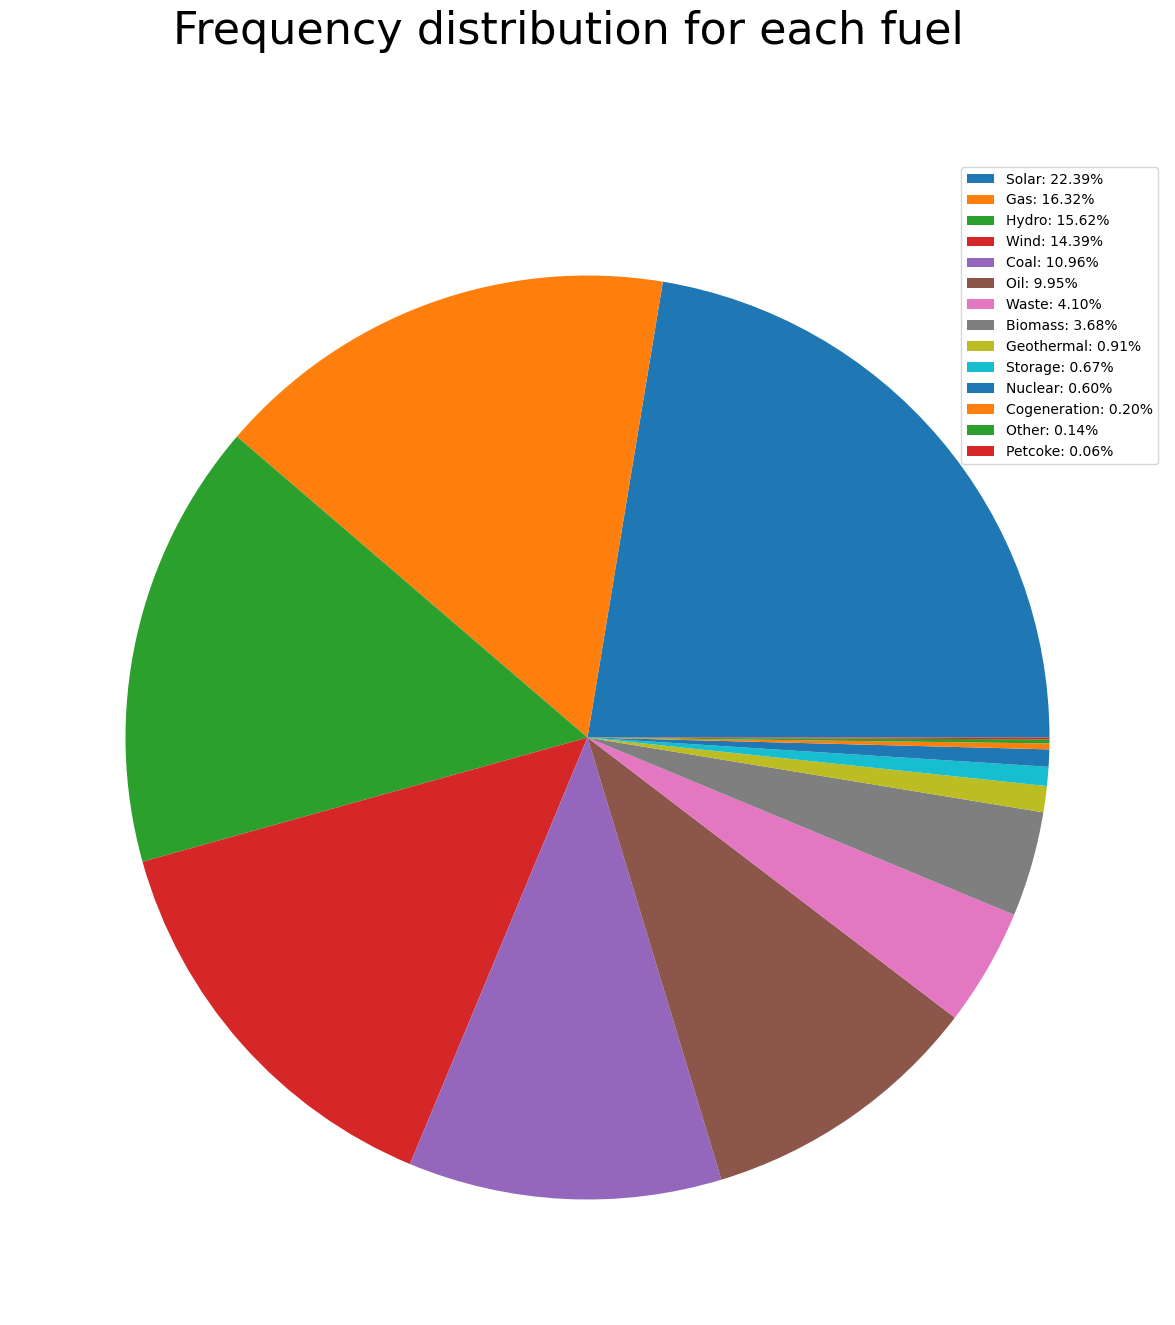

In [113]:
# pie chart showing the frequency distribution for each primary_fuel (14 in total)

fig, ax = plt.subplots(figsize = (15, 15))
fig.suptitle('Frequency distribution for each fuel', fontsize = 32)
ax.pie(freq)
ax.legend(labels = fuel_n_rf);

The analysis of the dataset reveals a notable insight: it is heavily imbalanced when it comes to certain categories of power plant primary fuels, specifically geothermal, storage, nuclear, cogeneration, petcoke, and others. Each aformentioned category contributes less than 1% of the total entries. Now let us understand the distribution of primary fuel categories on the basis of total extracted gdp and total extracted gdp per entry

In [114]:
# calculating total extracted gdp per primary fuel category
gdp_per_primary_fuel = [0 for i in range(14)]
for index, eg in enumerate(df.extracted_gdp):
    corresponding_fuel = (df.primary_fuel)[index]
    gdp_per_primary_fuel[fuels.index(corresponding_fuel)] = gdp_per_primary_fuel[fuels.index(corresponding_fuel)] + eg
gdp_per_primary_fuel, fuels

([6.190410591607752e+16,
  1.8074850224460064e+16,
  5275897441891136.0,
  1.927139647858932e+16,
  6441181500156912.0,
  7469928844729168.0,
  6441729860228524.0,
  2196322365127800.8,
  772509160480407.5,
  2010686828724000.0,
  212325702720251.75,
  305555630213000.0,
  137675618546899.3,
  42748602000000.0],
 ['Solar',
  'Gas',
  'Hydro',
  'Wind',
  'Coal',
  'Oil',
  'Waste',
  'Biomass',
  'Geothermal',
  'Storage',
  'Nuclear',
  'Cogeneration',
  'Other',
  'Petcoke'])

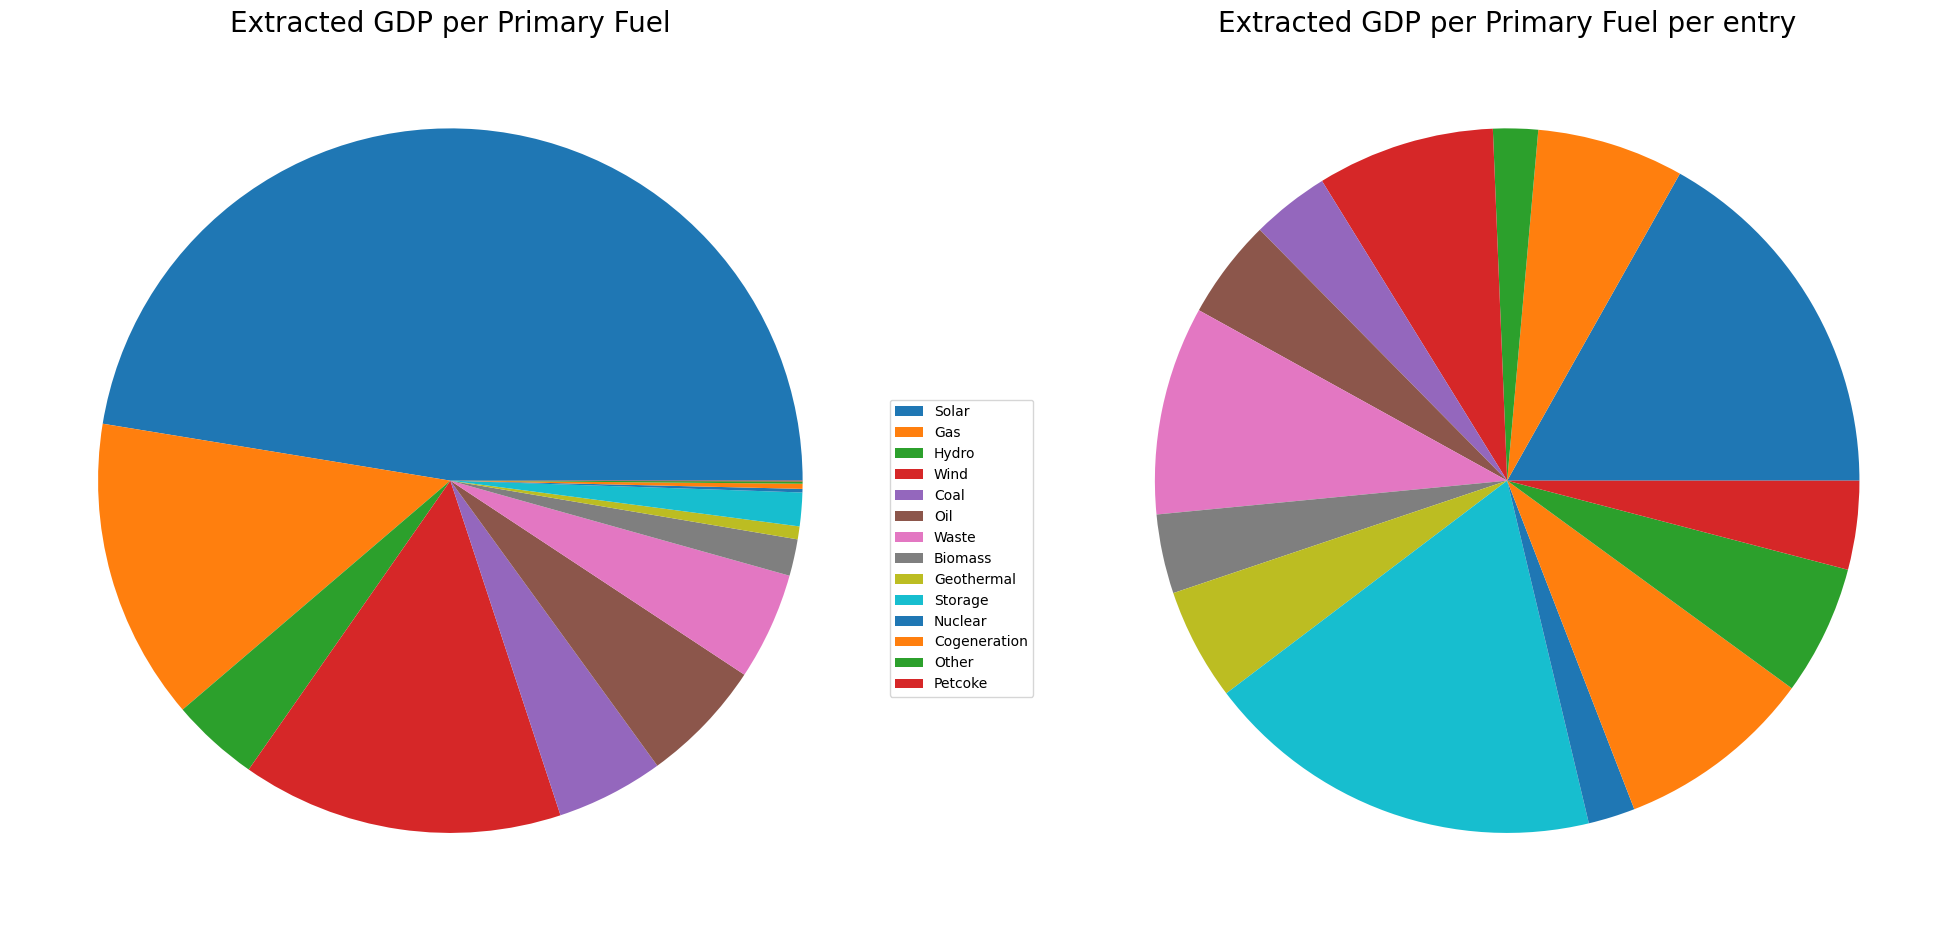

In [115]:

fig, (ax1, ax2) = plt.subplots(1, 2, figsize = (25, 20))

ax1.set_title('Extracted GDP per Primary Fuel', fontsize = 20)
ax1.pie(gdp_per_primary_fuel)
ax1.legend(fuels,loc='upper right', bbox_to_anchor=(1.17, 0.6))

# calculating gdp_per_primary_fuel_per_entry
gdp_per_primary_fuel_per_entry = []
for index, gdp in enumerate(gdp_per_primary_fuel):
    gdp_per_primary_fuel_per_entry.append(gdp/freq[index])

# plotting gdp per primary fuel per entry
ax2.pie(gdp_per_primary_fuel_per_entry)
ax2.set_title('Extracted GDP per Primary Fuel per entry', fontsize = 20)
plt.show();

In [116]:
gdp_per_primary_fuel_per_entry, fuels

([17686887404593.58,
  7085397971172.114,
  2160482162936.583,
  8568873489812.948,
  3760176007096.8545,
  4803812761883.709,
  10049500561978.977,
  3819691069787.4795,
  5402161961401.451,
  19333527199269.23,
  2258784071492.04,
  9548613444156.25,
  6257982661222.695,
  4274860200000.0],
 ['Solar',
  'Gas',
  'Hydro',
  'Wind',
  'Coal',
  'Oil',
  'Waste',
  'Biomass',
  'Geothermal',
  'Storage',
  'Nuclear',
  'Cogeneration',
  'Other',
  'Petcoke'])

An interesting observation arises when we examine the distribution of extracted GDP across different primary fuel categories in the dataset. At first glance, it might appear that the "Solar" category dominates due to having the most significant number of entries and the highest amount of total extracted GDP by a huge shot. However, a deeper analysis reveals that the distribution changes when we consider not just the total extracted GDP but also the number of entries within each category.

Initial Perception: Solar Dominance
Initially, when we calculate the distribution of extracted GDP for each primary fuel category, it becomes evident that "Solar" holds a prominent position. With its extensive representation in the dataset, the cumulative extracted GDP for solar power plants is indeed substantial. This leads to the perception that solar energy is the predominant contributor to the overall extracted GDP, given its sheer number of entries.

Revised Perspective: Balancing the Equation
However, the story takes a nuanced turn when we divide the total extracted GDP for each primary fuel category by the number of entries within that category. This calculation accounts for the average contribution of each type of power plant in terms of extracted GDP. When we consider this more balanced perspective, we discover that the distribution between categories becomes much more equitable.

Solar and Storage Perform Well:
Interestingly, categories like "Solar" and "Storage" emerge as strong contenders in this revised distribution analysis. The fact that their average extracted GDP per entry is competitive showcases their economic significance. This underscores the efficiency and profitability of solar and storage power plants on a per-unit basis.

A Balanced Landscape:
The calculation also brings to light a more balanced landscape among primary fuel categories. Categories that may have initially appeared overshadowed due to fewer entries prove to be economically meaningful when evaluated on a per-entry basis. This balanced distribution underscores the diverse economic contributions made by various types of power plants, each playing a crucial role in their respective contexts.

In [117]:
# top 5 and bottom 5 performing countries in terms of total extracted gdp per country

countries = np.unique(df.country).tolist()
countries

['ALB',
 'ARE',
 'ARG',
 'ARM',
 'AUT',
 'AZE',
 'BEL',
 'BGD',
 'BGR',
 'BHR',
 'BRA',
 'CAN',
 'CHE',
 'CHN',
 'COD',
 'COL',
 'CZE',
 'DEU',
 'DNK',
 'DOM',
 'DZA',
 'ECU',
 'EGY',
 'ESP',
 'EST',
 'ETH',
 'FIN',
 'FJI',
 'FRA',
 'GHA',
 'GRC',
 'GTM',
 'GUY',
 'HND',
 'IDN',
 'IND',
 'IRL',
 'IRN',
 'IRQ',
 'ISL',
 'ISR',
 'ITA',
 'JAM',
 'JPN',
 'KAZ',
 'KEN',
 'KHM',
 'KOR',
 'KWT',
 'LAO',
 'LBN',
 'LBY',
 'LKA',
 'MAR',
 'MMR',
 'MNG',
 'MRT',
 'MUS',
 'MYS',
 'NLD',
 'NZL',
 'OMN',
 'PAK',
 'PER',
 'PHL',
 'PNG',
 'POL',
 'PRT',
 'PRY',
 'ROU',
 'RUS',
 'RWA',
 'SAU',
 'SWE',
 'THA',
 'TJK',
 'TTO',
 'TUN',
 'TUR',
 'TZA',
 'USA',
 'UZB',
 'VEN',
 'VNM',
 'YEM',
 'ZAF',
 'ZMB']

In [118]:
gdp_per_country = [0 for i in range(len(countries))]
for index, eg in enumerate(df.extracted_gdp):
    corresponding_country = (df.country[index])
    gdp_per_country[countries.index(corresponding_country)] = gdp_per_country[countries.index(corresponding_country)] + eg
gdp_per_country, countries


([1897050133.42015,
  4641153904304.317,
  13287921826345.521,
  9260285762.09704,
  9380388647396.598,
  328778801033.9415,
  5105383447252.54,
  1982438042606.8433,
  129598754240.9317,
  62752180951.962036,
  3042400457023373.5,
  21025192721975.1,
  7539036135431.661,
  5283150926837394.0,
  196937846940.6324,
  466961535733.5487,
  1070724932615.0946,
  873190134375707.9,
  5630421120192.3125,
  31723952274.14358,
  2686725312095.505,
  305203254507.30884,
  2882505121396.2056,
  390703190958893.2,
  249306727134.22067,
  263742356226.50394,
  52448332874.07,
  25608201787.443638,
  8975317958279.18,
  96842681029.75659,
  5834394638016.433,
  2128794869757.549,
  3025187428.38436,
  149014998158.79388,
  15798849779827.867,
  451488602606128.5,
  8737249397575.89,
  16701006022280.432,
  2526846957488.054,
  83887969527.8756,
  8215216687857.468,
  100179705513772.44,
  26199707016.13085,
  304866517142201.5,
  298129363217.0715,
  600214116507.8732,
  163527347746.59607,
  35435

In [119]:
len(gdp_per_country), len(countries)

(87, 87)

In [120]:
# visualisation of top 5 performers and bottom 4 performers
# implementation of an algorithm that arranges one array in the order of the other array
gdp_country = []
for index, item in enumerate(gdp_per_country):
    gdp_country.append([item, countries[index]])


    

In [121]:
gdp_country[:5]

[[1897050133.42015, 'ALB'],
 [4641153904304.317, 'ARE'],
 [13287921826345.521, 'ARG'],
 [9260285762.09704, 'ARM'],
 [9380388647396.598, 'AUT']]

In [140]:
# creating a bubble sort algorithm which sorts on the basis of the the first item in the 2D array


n = len(gdp_country)
# Traverse through all array elements
for i in range(n):
    # Flag to optimize the algorithm
    swapped = False

    # Last i elements are already in place, so we don't need to check them again
    for j in range(0, n):
        # Swap if the element found is greater than the next element
        if j != len(gdp_country) - 1:
            if (gdp_country[j])[0]> (gdp_country[j + 1])[0]:
                gdp_country[j], gdp_country[j+1] = gdp_country[j+1], gdp_country[j]
                print(True)
                swapped = True

    # If no two elements were swapped in the inner loop, the array is already sorted
    if not swapped:
        break


Text(0, 0.5, 'Total extracted GDP in dollars ($)')

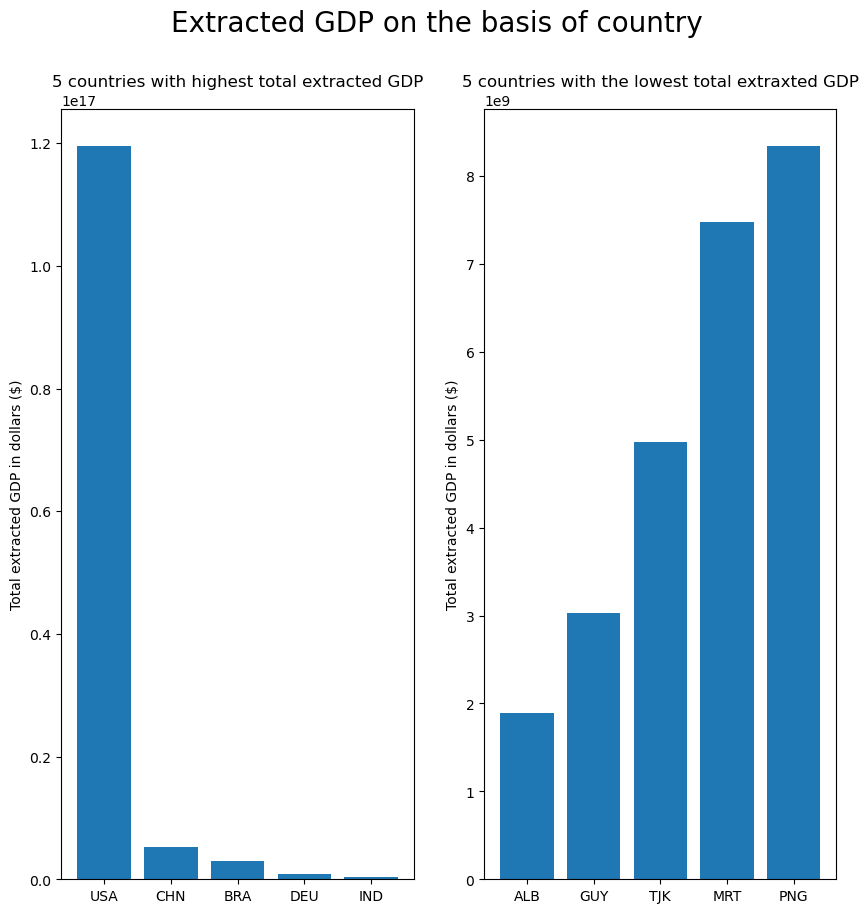

In [164]:
top_5_countries = gdp_country[-1:-6:-1]
bottom_5_countries = gdp_country[0:5]

fig, (ax1, ax2) = plt.subplots(1,2,figsize = (10, 10))
fig.suptitle('Extracted GDP on the basis of country', fontsize = 20)
ax1.bar([item[1] for item in top_5_countries],[item[0] for item in top_5_countries])
ax2.bar([item[1] for item in bottom_5_countries],[item[0] for item in bottom_5_countries])

ax1.set_title('5 countries with highest total extracted GDP')
ax2.set_title('5 countries with the lowest total extraxted GDP')

ax1.set_ylabel('Total extracted GDP in dollars ($)')
ax2.set_ylabel('Total extracted GDP in dollars ($)')

In [166]:
# Geopandas testing
import geopandas
from geodatasets import get_path

path_to_data = get_path("nybb")
gdf = geopandas.read_file(path_to_data)

gdf

Extracting 'nybb_16a/nybb.shp' from '/Users/anhadsinghnarang/Library/Caches/geodatasets/nybb_16a.zip' to '/Users/anhadsinghnarang/Library/Caches/geodatasets/nybb_16a.zip.unzip'
Extracting 'nybb_16a/nybb.shx' from '/Users/anhadsinghnarang/Library/Caches/geodatasets/nybb_16a.zip' to '/Users/anhadsinghnarang/Library/Caches/geodatasets/nybb_16a.zip.unzip'
Extracting 'nybb_16a/nybb.dbf' from '/Users/anhadsinghnarang/Library/Caches/geodatasets/nybb_16a.zip' to '/Users/anhadsinghnarang/Library/Caches/geodatasets/nybb_16a.zip.unzip'
Extracting 'nybb_16a/nybb.prj' from '/Users/anhadsinghnarang/Library/Caches/geodatasets/nybb_16a.zip' to '/Users/anhadsinghnarang/Library/Caches/geodatasets/nybb_16a.zip.unzip'


,BoroCode,BoroName,Shape_Leng,Shape_Area,geometry
0,5,Staten Island,330470.010332,1.623820e+09,"MULTIPOLYGON (((970217.022 145643.332, 970227...."
1,4,Queens,896344.047763,3.045213e+09,"MULTIPOLYGON (((1029606.077 156073.814, 102957..."
2,3,Brooklyn,741080.523166,1.937479e+09,"MULTIPOLYGON (((1021176.479 151374.797, 102100..."
3,1,Manhattan,359299.096471,6.364715e+08,"MULTIPOLYGON (((981219.056 188655.316, 980940...."
4,2,Bronx,464392.991824,1.186925e+09,"MULTIPOLYGON (((1012821.806 229228.265, 101278..."


In [167]:
gdf = gdf.set_index("BoroName")

In [168]:
gdf["area"] = gdf.area
gdf["boundary"] = gdf.boundary

<Axes: >

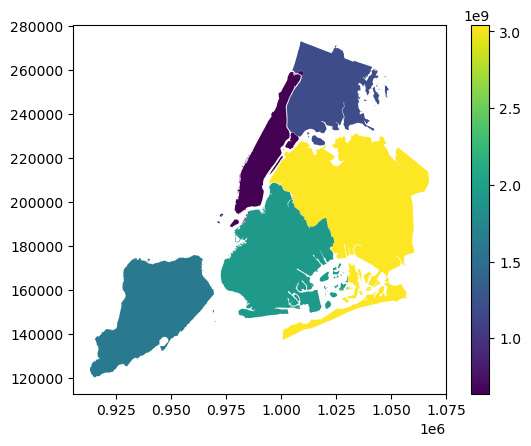

In [169]:
gdf.plot("area", legend=True)